# 库导入

In [1]:
import numpy as np
import pandas as pd


# 数据导入

In [2]:
sheet = pd.read_csv('data.csv')
data = sheet.iloc[:, :].values

sheet.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,0:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112,W,NCTL,0


In [3]:
print(data)

[['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'BC' 'NCTL'
  'ND']
 ['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'B' 'CTL'
  'ND']
 ['2023-wimbledon-1301' 'Carlos Alcaraz' 'Nicolas Jarry' ... 'B' 'NCTL'
  'D']
 ...
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'C' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']]


In [4]:
final_match = []

for i in data:
    if i[0] == '2023-wimbledon-1701':
        final_match.append(i)

final_match = np.array(final_match)
print(final_match)

[['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'CTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']
 ...
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'W' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'C' 'NCTL'
  'D']
 ['2023-wimbledon-1701' 'Carlos Alcaraz' 'Novak Djokovic' ... 'BW' 'NCTL'
  'ND']]


In [5]:
# 打印出所有的列名
category = dict()
for i in range(len(sheet.columns)):
    category[sheet.columns[i]] = i
print(category)

{'match_id': 0, 'player1': 1, 'player2': 2, 'elapsed_time': 3, 'set_no': 4, 'game_no': 5, 'point_no': 6, 'p1_sets': 7, 'p2_sets': 8, 'p1_games': 9, 'p2_games': 10, 'p1_score': 11, 'p2_score': 12, 'server': 13, 'serve_no': 14, 'point_victor': 15, 'p1_points_won': 16, 'p2_points_won': 17, 'game_victor': 18, 'set_victor': 19, 'p1_ace': 20, 'p2_ace': 21, 'p1_winner': 22, 'p2_winner': 23, 'winner_shot_type': 24, 'p1_double_fault': 25, 'p2_double_fault': 26, 'p1_unf_err': 27, 'p2_unf_err': 28, 'p1_net_pt': 29, 'p2_net_pt': 30, 'p1_net_pt_won': 31, 'p2_net_pt_won': 32, 'p1_break_pt': 33, 'p2_break_pt': 34, 'p1_break_pt_won': 35, 'p2_break_pt_won': 36, 'p1_break_pt_missed': 37, 'p2_break_pt_missed': 38, 'p1_distance_run': 39, 'p2_distance_run': 40, 'rally_count': 41, 'speed_mph': 42, 'serve_width': 43, 'serve_depth': 44, 'return_depth': 45}


## 双误失分
double_fault_1 : { n : m }     代表 Carlos Alcaraz 截止第n个point，双误失分m次

double_fault_2 : { n : m }     代表 Novak Djokovic 截止第n个point，双误失分m次

In [6]:
print(len(final_match))
double_fault_1, double_fault_2 = dict(), dict()
unf_err_1,unf_err_2 = dict(),dict()
get_ace_1,get_ace_2 = dict(),dict()
return_duce_1,return_duce_2 = dict(),dict()
get_ad_1,get_ad_2 = dict(),dict()
run_distance_1,run_distance_2 = dict(),dict()
hit_num_1,hit_num_2 = dict(),dict()
on_net_1,on_net_2 = dict(),dict()
on_net_success_1,on_net_success_2 = dict(),dict()
game_score_1,game_score_2 = dict(),dict()
set_score_1,set_score_2 = dict(),dict()

334


In [7]:
for i in range(len(final_match)):
    if i==0:
        double_fault_1[i+1] = 0
        double_fault_2[i+1] = 0
    else:
        double_fault_1[i+1] = double_fault_1[i] + final_match[i][category['p1_double_fault']]
        double_fault_2[i+1] = double_fault_2[i] + final_match[i][category['p2_double_fault']]


print(double_fault_1)   
print(double_fault_2)
    

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 2, 85: 2, 86: 2, 87: 2, 88: 2, 89: 2, 90: 2, 91: 2, 92: 2, 93: 2, 94: 2, 95: 2, 96: 2, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 2, 131: 2, 132: 2, 133: 2, 134: 2, 135: 2, 136: 2, 137: 2, 138: 2, 139

## 受迫失误


In [8]:
for i in range(len(final_match)):
    if i==0:
        unf_err_1[i+1] = 0
        unf_err_2[i+1] = 0
    else:
        unf_err_1[i+1] = unf_err_1[i] + final_match[i][category['p1_unf_err']]
        unf_err_2[i+1] = unf_err_2[i] + final_match[i][category['p2_unf_err']]

print(unf_err_1)
print(unf_err_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 2, 12: 2, 13: 3, 14: 3, 15: 3, 16: 3, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 6, 33: 6, 34: 7, 35: 7, 36: 7, 37: 7, 38: 8, 39: 9, 40: 9, 41: 9, 42: 9, 43: 9, 44: 9, 45: 9, 46: 9, 47: 9, 48: 9, 49: 9, 50: 9, 51: 9, 52: 9, 53: 9, 54: 9, 55: 10, 56: 10, 57: 10, 58: 10, 59: 10, 60: 10, 61: 11, 62: 11, 63: 11, 64: 11, 65: 11, 66: 12, 67: 12, 68: 13, 69: 13, 70: 13, 71: 14, 72: 14, 73: 14, 74: 15, 75: 15, 76: 15, 77: 16, 78: 16, 79: 16, 80: 16, 81: 16, 82: 16, 83: 16, 84: 16, 85: 16, 86: 16, 87: 16, 88: 16, 89: 16, 90: 16, 91: 16, 92: 16, 93: 16, 94: 16, 95: 16, 96: 16, 97: 16, 98: 16, 99: 16, 100: 16, 101: 17, 102: 18, 103: 18, 104: 18, 105: 18, 106: 18, 107: 18, 108: 19, 109: 19, 110: 19, 111: 20, 112: 20, 113: 21, 114: 21, 115: 22, 116: 22, 117: 22, 118: 22, 119: 22, 120: 22, 121: 22, 122: 22, 123: 22, 124: 22, 125: 22, 126: 23, 127: 23, 128: 23, 129: 23, 

# ACE得分

In [9]:
for i in range(len(final_match)):
    if i==0:
        get_ace_1[i+1] = 0
        get_ace_2[i+1] = 0
    else:
        get_ace_1[i+1] = get_ace_1[i] + final_match[i][category['p1_ace']]
        get_ace_2[i+1] = get_ace_2[i] + final_match[i][category['p2_ace']]

print(get_ace_1)
print(get_ace_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 130: 3, 131: 3, 132: 3, 133: 3, 134: 3, 135: 3, 136: 3, 137: 3, 138: 3, 139

## 回到deuce


In [10]:
for i in range(len(final_match)):
    if i==0:
        return_duce_1[i+1] = 0
        return_duce_2[i+1] = 0
    else:
        if final_match[i][category['p1_score']] < final_match[i][category['p2_score']] or final_match[i][category['p2_score']]=='AD' and final_match[i+1][category['p1_score']] == final_match[i][category['p2_score']]:
            duce1 = 0
        else:
            duce1 = 1
        

        if final_match[i][category['p2_score']] < final_match[i][category['p1_score']] or final_match[i][category['p1_score']]=='AD' and final_match[i+1][category['p2_score']] == final_match[i][category['p1_score']]:
            duce2 = 0
        else:   
            duce2 = 1
        return_duce_1[i+1] = return_duce_1[i] + duce1
        return_duce_2[i+1] = return_duce_2[i] + duce2



print(return_duce_1)
print(return_duce_2)

{1: 0, 2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 5, 9: 6, 10: 6, 11: 7, 12: 7, 13: 7, 14: 7, 15: 7, 16: 7, 17: 8, 18: 8, 19: 9, 20: 10, 21: 11, 22: 11, 23: 12, 24: 12, 25: 13, 26: 13, 27: 13, 28: 13, 29: 14, 30: 14, 31: 15, 32: 15, 33: 15, 34: 15, 35: 15, 36: 16, 37: 17, 38: 18, 39: 19, 40: 20, 41: 21, 42: 22, 43: 22, 44: 22, 45: 22, 46: 23, 47: 24, 48: 25, 49: 26, 50: 27, 51: 28, 52: 29, 53: 30, 54: 31, 55: 32, 56: 32, 57: 33, 58: 34, 59: 35, 60: 36, 61: 37, 62: 37, 63: 38, 64: 39, 65: 40, 66: 41, 67: 42, 68: 42, 69: 43, 70: 44, 71: 45, 72: 46, 73: 47, 74: 48, 75: 49, 76: 49, 77: 50, 78: 50, 79: 51, 80: 52, 81: 53, 82: 54, 83: 55, 84: 56, 85: 57, 86: 58, 87: 59, 88: 60, 89: 61, 90: 62, 91: 63, 92: 63, 93: 64, 94: 65, 95: 66, 96: 67, 97: 68, 98: 68, 99: 69, 100: 69, 101: 69, 102: 70, 103: 70, 104: 71, 105: 72, 106: 73, 107: 74, 108: 75, 109: 76, 110: 76, 111: 77, 112: 77, 113: 78, 114: 78, 115: 79, 116: 79, 117: 80, 118: 81, 119: 82, 120: 83, 121: 83, 122: 84, 123: 84, 124: 85, 125: 85, 1

## 获得AD

In [11]:
for i in range(len(final_match)):
    if i==0:
        get_ad_1[i+1] = 0
        get_ad_2[i+1] = 0
    else:
        if final_match[i][category['p1_score']] == 'AD' and final_match[i+1][category['p1_score']] != 'AD':
            ad1 = 1
        else:
            ad1 = 0
        if final_match[i][category['p2_score']] == 'AD' and final_match[i+1][category['p2_score']] != 'AD':
            ad2 = 1
        else:
            ad2 = 0
        get_ad_1[i+1] = get_ad_1[i] + ad1
        get_ad_2[i+1] = get_ad_2[i] + ad2
print(get_ad_1)
print(get_ad_2)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 1, 59: 1, 60: 2, 61: 2, 62: 2, 63: 2, 64: 2, 65: 2, 66: 2, 67: 2, 68: 2, 69: 2, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 2, 78: 2, 79: 2, 80: 2, 81: 2, 82: 2, 83: 2, 84: 3, 85: 3, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 4, 109: 4, 110: 4, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 4, 117: 4, 118: 4, 119: 4, 120: 4, 121: 4, 122: 4, 123: 4, 124: 4, 125: 4, 126: 4, 127: 4, 128: 4, 129: 4, 130: 4, 131: 4, 132: 4, 133: 4, 134: 4, 135: 4, 136: 4, 137: 4, 138: 4, 139

## 体能消耗

In [12]:
for i in range(len(final_match)):
    if i==0:
        run_distance_1[i+1] = 0
        run_distance_2[i+1] = 0
    else:
        run_distance_1[i+1] = run_distance_1[i] + final_match[i][category['p1_distance_run']]
        run_distance_2[i+1] = run_distance_2[i] + final_match[i][category['p2_distance_run']]
print(run_distance_1)
print(run_distance_2)

{1: 0, 2: 18.502, 3: 23.287999999999997, 4: 28.194999999999997, 5: 41.07599999999999, 6: 48.36899999999999, 7: 71.65199999999999, 8: 94.83099999999999, 9: 123.94599999999998, 10: 132.88699999999997, 11: 138.42699999999996, 12: 155.24599999999995, 13: 176.72799999999995, 14: 186.60399999999996, 15: 194.24199999999996, 16: 216.12199999999996, 17: 236.19999999999996, 18: 266.00499999999994, 19: 297.98599999999993, 20: 391.3499999999999, 21: 439.5909999999999, 22: 440.2599999999999, 23: 452.5379999999999, 24: 455.3209999999999, 25: 486.1859999999999, 26: 513.93, 27: 526.2969999999999, 28: 531.9799999999999, 29: 567.4359999999999, 30: 578.5029999999999, 31: 584.376, 32: 597.405, 33: 611.3009999999999, 34: 637.867, 35: 652.164, 36: 661.3199999999999, 37: 670.7729999999999, 38: 677.5799999999999, 39: 678.656, 40: 712.1479999999999, 41: 728.3409999999999, 42: 760.2979999999999, 43: 768.7889999999999, 44: 773.1929999999999, 45: 786.6909999999999, 46: 811.6419999999999, 47: 846.5649999999999, 48

## 击球次数

In [13]:
for i in range(len(final_match)):
    if i==0:
        hit_num_1[i+1] = 0
        hit_num_2[i+1] = 0
    else:
        hit_num_1[i+1] = hit_num_1[i] + final_match[i][category['rally_count']]
        hit_num_2[i+1] = hit_num_2[i] + final_match[i][category['rally_count']]

## 上网次数

In [14]:
for i in range(len(final_match)):
    if i==0:
        on_net_1[i+1] = 0
        on_net_2[i+1] = 0
    else:
        on_net_1[i+1] = on_net_1[i] + final_match[i][category['p1_net_pt']]
        on_net_2[i+1] = on_net_2[i] + final_match[i][category['p2_net_pt']]

## 上网成功次数

In [15]:
for i in range(len(final_match)):
    if i==0:
        on_net_success_1[i+1] = 0
        on_net_success_2[i+1] = 0
    else:
        on_net_success_1[i+1] = on_net_success_1[i] + final_match[i][category['p1_net_pt_won']]
        on_net_success_2[i+1] = on_net_success_2[i] + final_match[i][category['p2_net_pt_won']]
print(on_net_success_1)


{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 1, 37: 1, 38: 1, 39: 1, 40: 2, 41: 2, 42: 2, 43: 2, 44: 2, 45: 2, 46: 3, 47: 3, 48: 4, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 6, 63: 6, 64: 6, 65: 6, 66: 6, 67: 6, 68: 6, 69: 6, 70: 6, 71: 6, 72: 6, 73: 6, 74: 6, 75: 6, 76: 6, 77: 6, 78: 6, 79: 6, 80: 7, 81: 7, 82: 7, 83: 8, 84: 8, 85: 8, 86: 8, 87: 8, 88: 8, 89: 8, 90: 8, 91: 8, 92: 8, 93: 9, 94: 9, 95: 9, 96: 9, 97: 9, 98: 9, 99: 9, 100: 9, 101: 9, 102: 9, 103: 9, 104: 9, 105: 9, 106: 9, 107: 9, 108: 9, 109: 9, 110: 9, 111: 9, 112: 9, 113: 9, 114: 9, 115: 9, 116: 9, 117: 9, 118: 9, 119: 9, 120: 9, 121: 9, 122: 9, 123: 9, 124: 9, 125: 9, 126: 9, 127: 9, 128: 9, 129: 9, 130: 9, 131: 9, 132: 9, 133: 9, 134: 9, 135: 9, 136: 9, 137: 9, 138: 9, 139

# FZJ

In [16]:
one_serve_win_1,         one_serve_win_2       = dict(), dict()
one_serve_back_1,        one_serve_back_2      = dict(), dict()
one_serve_success_1,     one_serve_success_2   = dict(), dict()
two_serve_win_1,         two_serve_win_2       = dict(), dict()
two_serve_back_1,        two_serve_back_2      = dict(), dict()
break_pt_1,              break_pt_2            = dict(), dict()
break_pt_won_1,          break_pt_won_2        = dict(), dict()
continuous_win_1,        continuous_win_2      = dict(), dict()
avg_mph_1,               avg_mph_2             = dict(), dict()
max_mph_1,               max_mph_2             = dict(), dict()

In [17]:
last_won = 0
total_mph_1 = 0
total_mph_2 = 0
serve_times_1 = 0
serve_times_2 = 0


for i in range(len(final_match)):
    total_mph_1 += (final_match[i][category['speed_mph']] if final_match[i][category['server']] == 1 else 0)
    total_mph_2 += (final_match[i][category['speed_mph']] if final_match[i][category['server']] == 2 else 0)
    serve_times_1 += (final_match[i][category['server']] == 1)
    serve_times_2 += (final_match[i][category['server']] == 2)
    
    one_serve_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 1)
    one_serve_back_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_back_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 1)
    one_serve_success_1[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_success_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1)
    two_serve_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 1)
    two_serve_back_1[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_back_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 1 and final_match[i][category['p2_double_fault']] == 0)
    break_pt_1[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p1_break_pt']] == 1)
    break_pt_won_1[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_won_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p1_break_pt_won']] == 1)
    continuous_win_1[final_match[i][category['point_no']]] = (0 if i == 0 else continuous_win_1[final_match[i - 1][category['point_no']]]) + (final_match[i][category['point_victor']] == 1 and last_won == 1)
    
    avg_mph_1[final_match[i][category['point_no']]] = (0 if serve_times_1 == 0 else total_mph_1 / serve_times_1)
    max_mph_1[final_match[i][category['point_no']]] = (0 if i == 0 else max_mph_1[final_match[i - 1][category['point_no']]])
    max_mph_1[final_match[i][category['point_no']]] = (max(max_mph_1[final_match[i][category['point_no']]], final_match[i][category['speed_mph']]) if final_match[i][category['server']] == 1 else max_mph_1[final_match[i][category['point_no']]])
    
    one_serve_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 2)
    one_serve_back_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_back_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 2)
    one_serve_success_2[final_match[i][category['point_no']]] = (0 if i == 0 else one_serve_success_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 1 and final_match[i][category['server']] == 2)
    two_serve_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 2 and final_match[i][category['point_victor']] == 2)
    two_serve_back_2[final_match[i][category['point_no']]] = (0 if i == 0 else two_serve_back_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['serve_no']] == 2 and final_match[i][category['server']] == 1 and final_match[i][category['point_victor']] == 2 and final_match[i][category['p1_double_fault']] == 0)
    break_pt_2[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p2_break_pt']] == 1)
    break_pt_won_2[final_match[i][category['point_no']]] = (0 if i == 0 else break_pt_won_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['p2_break_pt_won']] == 1)
    continuous_win_2[final_match[i][category['point_no']]] = (0 if i == 0 else continuous_win_2[final_match[i - 1][category['point_no']]]) + (final_match[i][category['point_victor']] == 2 and last_won == 2)
    
    avg_mph_2[final_match[i][category['point_no']]] = (0 if serve_times_2 == 0 else total_mph_2 / serve_times_2)
    max_mph_2[final_match[i][category['point_no']]] = (0 if i == 0 else max_mph_2[final_match[i - 1][category['point_no']]])
    max_mph_2[final_match[i][category['point_no']]] = (max(max_mph_2[final_match[i][category['point_no']]], final_match[i][category['speed_mph']]) if final_match[i][category['server']] == 2 else max_mph_2[final_match[i][category['point_no']]])
    
    last_won = final_match[i][category['point_victor']]
    

# 合并数据，用于训练

In [18]:

one_serve_win_1 = np.array(list(one_serve_win_1.values()))
one_serve_win_2 = np.array(list(one_serve_win_2.values()))
one_serve_back_1 = np.array(list(one_serve_back_1.values()))
one_serve_back_2 = np.array(list(one_serve_back_2.values()))
one_serve_success_1 = np.array(list(one_serve_success_1.values()))
one_serve_success_2 = np.array(list(one_serve_success_2.values()))
two_serve_win_1 = np.array(list(two_serve_win_1.values()))
two_serve_win_2 = np.array(list(two_serve_win_2.values()))
two_serve_back_1 = np.array(list(two_serve_back_1.values()))
two_serve_back_2 = np.array(list(two_serve_back_2.values()))
break_pt_1 = np.array(list(break_pt_1.values()))
break_pt_2 = np.array(list(break_pt_2.values()))
break_pt_won_1 = np.array(list(break_pt_won_1.values()))
break_pt_won_2 = np.array(list(break_pt_won_2.values()))
continuous_win_1 = np.array(list(continuous_win_1.values()))
continuous_win_2 = np.array(list(continuous_win_2.values()))
avg_mph_1 = np.array(list(avg_mph_1.values()))
avg_mph_2 = np.array(list(avg_mph_2.values()))
max_mph_1 = np.array(list(max_mph_1.values()))
max_mph_2 = np.array(list(max_mph_2.values()))

double_fault_1 = np.array(list(double_fault_1.values()))
double_fault_2 = np.array(list(double_fault_2.values()))
unf_err_1 = np.array(list(unf_err_1.values()))
unf_err_2 = np.array(list(unf_err_2.values()))
get_ace_1 = np.array(list(get_ace_1.values()))
get_ace_2 = np.array(list(get_ace_2.values()))
return_duce_1 = np.array(list(return_duce_1.values()))
return_duce_2 = np.array(list(return_duce_2.values()))
get_ad_1 = np.array(list(get_ad_1.values()))
get_ad_2 = np.array(list(get_ad_2.values()))
run_distance_1 = np.array(list(run_distance_1.values()))
run_distance_2 = np.array(list(run_distance_2.values()))
hit_num_1 = np.array(list(hit_num_1.values()))
hit_num_2 = np.array(list(hit_num_2.values()))
on_net_1 = np.array(list(on_net_1.values()))
on_net_2 = np.array(list(on_net_2.values()))
on_net_success_1 = np.array(list(on_net_success_1.values()))
on_net_success_2 = np.array(list(on_net_success_2.values()))

print(len(one_serve_win_1))
print(len(double_fault_1))

334
334


In [19]:
# 打印出上面数组所有的长度
print('on_serve_1',len(one_serve_win_1))
print('on_serve_2',len(one_serve_win_2))
print('one_serve_back_1',len(one_serve_back_1))
print('one_serve_back_2',len(one_serve_back_2))
print('one_serve_success_1',len(one_serve_success_1))
print('one_serve_success_2',len(one_serve_success_2))
print('two_serve_win_1',len(two_serve_win_1))
print('two_serve_win_2',len(two_serve_win_2))
print('two_serve_back_1',len(two_serve_back_1))
print('two_serve_back_2',len(two_serve_back_2))
print('break_pt_1',len(break_pt_1))
print('break_pt_2',len(break_pt_2))
print('break_pt_won_1',len(break_pt_won_1))
print('break_pt_won_2',len(break_pt_won_2))
print('continuous_win_1',len(continuous_win_1))
print('continuous_win_2',len(continuous_win_2))
print('avg_mph_1',len(avg_mph_1))
print('avg_mph_2',len(avg_mph_2))
print('max_mph_1',len(max_mph_1))
print('max_mph_2',len(max_mph_2))

print('double_fault_1',len(double_fault_1))
print('double_fault_2',len(double_fault_2))
print('unf_err_1',len(unf_err_1))
print('unf_err_2',len(unf_err_2))
print('get_ace_1',len(get_ace_1))
print('get_ace_2',len(get_ace_2))
print('return_duce_1',len(return_duce_1))
print('return_duce_2',len(return_duce_2))
print('get_ad_1',len(get_ad_1))
print('get_ad_2',len(get_ad_2))
print('run_distance_1',len(run_distance_1))
print('run_distance_2',len(run_distance_2))
print('hit_num_1',len(hit_num_1))
print('hit_num_2',len(hit_num_2))
print('on_net_1',len(on_net_1))
print('on_net_2',len(on_net_2))
print('on_net_success_1',len(on_net_success_1))
print('on_net_success_2',len(on_net_success_2))




on_serve_1 334
on_serve_2 334
one_serve_back_1 334
one_serve_back_2 334
one_serve_success_1 334
one_serve_success_2 334
two_serve_win_1 334
two_serve_win_2 334
two_serve_back_1 334
two_serve_back_2 334
break_pt_1 334
break_pt_2 334
break_pt_won_1 334
break_pt_won_2 334
continuous_win_1 334
continuous_win_2 334
avg_mph_1 334
avg_mph_2 334
max_mph_1 334
max_mph_2 334
double_fault_1 334
double_fault_2 334
unf_err_1 334
unf_err_2 334
get_ace_1 334
get_ace_2 334
return_duce_1 334
return_duce_2 334
get_ad_1 334
get_ad_2 334
run_distance_1 334
run_distance_2 334
hit_num_1 334
hit_num_2 334
on_net_1 334
on_net_2 334
on_net_success_1 334
on_net_success_2 334


In [20]:
# 将上面的数组合并成一个大的矩阵，用于训练
train_data = np.array([one_serve_win_1, one_serve_win_2, one_serve_back_1, one_serve_back_2, one_serve_success_1, one_serve_success_2, two_serve_win_1, two_serve_win_2, two_serve_back_1, two_serve_back_2, break_pt_1, break_pt_2, break_pt_won_1, break_pt_won_2, continuous_win_1, continuous_win_2, avg_mph_1, avg_mph_2, max_mph_1, max_mph_2, double_fault_1, double_fault_2, unf_err_1, unf_err_2, get_ace_1, get_ace_2, return_duce_1, return_duce_2, get_ad_1, get_ad_2, run_distance_1, run_distance_2, hit_num_1, hit_num_2, on_net_1, on_net_2, on_net_success_1, on_net_success_2]).T
print(train_data.shape)

(334, 38)


In [21]:
train_label = final_match[:, category['point_victor']]
print(train_label.shape)
print(train_label)

(334,)
[2 1 1 2 1 2 2 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 2 1 1 2 2 2 2 1 2 2 1 1
 2 2 1 1 2 2 2 2 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 2 1 2 2 2 1 1 2 2 1 2
 2 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 2 2 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2
 1 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 2 1 1 1 2 1 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2
 1 1 1 2 1 2 1 1 2 2 2 1 2 2 2 1 1 1 1 1 2 2 2 1 1 2 1 2 1 1 2 2 1 1 2 2 1
 1 2 2 1 1 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 2
 2 1 2 1 1 2 2 1 2 1 2 1 1 2 2 1 1 2 1 2 2 1 2 1 2 2 1 2 1 2 2 2 1 2 2 1 2
 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 1 2 2 2 1 2 1 2 1 1 1 1 2 1 2 1
 1 1 1 1 1 2 2 2 1 2 2 1 2 1 1 1 2 1 2 1 2 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1
 1]


In [22]:
one_serve_win  = np.append(one_serve_win_1, one_serve_win_2)
one_serve_back = np.append(one_serve_back_1, one_serve_back_2)
one_serve_success = np.append(one_serve_success_1, one_serve_success_2)
two_serve_win = np.append(two_serve_win_1, two_serve_win_2)
two_serve_back = np.append(two_serve_back_1, two_serve_back_2)
break_pt = np.append(break_pt_1, break_pt_2)
break_pt_won = np.append(break_pt_won_1, break_pt_won_2)
continuous_win = np.append(continuous_win_1, continuous_win_2)
avg_mph = np.append(avg_mph_1, avg_mph_2)
max_mph = np.append(max_mph_1, max_mph_2)
double_fault = np.append(double_fault_1, double_fault_2)
unf_err = np.append(unf_err_1, unf_err_2)
get_ace = np.append(get_ace_1, get_ace_2)
return_duce = np.append(return_duce_1, return_duce_2)
get_ad = np.append(get_ad_1, get_ad_2)
run_distance = np.append(run_distance_1, run_distance_2)
hit_num = np.append(hit_num_1, hit_num_2)
on_net = np.append(on_net_1, on_net_2)
on_net_success = np.append(on_net_success_1, on_net_success_2)
print(one_serve_win.shape)

(668,)


In [23]:
# 将max_mph和avg_mph归一化
max_mph = (max_mph - max_mph.min()) / (max_mph.max() - max_mph.min())
avg_mph = (avg_mph - avg_mph.min()) / (avg_mph.max() - avg_mph.min())


In [24]:
train_data = np.array([one_serve_win, one_serve_back, one_serve_success, two_serve_win, two_serve_back, break_pt, break_pt_won, continuous_win, avg_mph, max_mph, double_fault, unf_err, get_ace, return_duce, get_ad, run_distance, hit_num, on_net, on_net_success]).T


print(train_data.shape)
print(train_label.shape)

# 将train_label 复制一遍，拼接到train_label的后面
train_label = np.append(train_label, train_label)
print(train_label.shape)
        

(668, 19)
(334,)
(668,)


In [25]:
print(train_label.shape)

(668,)


In [26]:
# 将train_data PCA降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_data_2 = pca.fit_transform(train_data)
print(train_data_2.shape)


(668, 2)


In [27]:
print(train_data_2.shape)
print(train_label.shape)

(668, 2)
(668,)


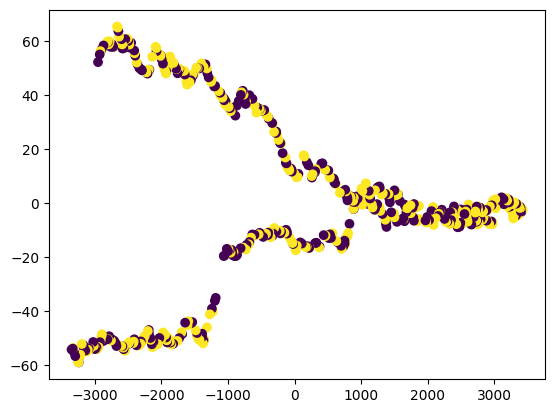

In [28]:
# 评价一下降维的效果
import matplotlib.pyplot as plt
plt.scatter(train_data_2[:, 0], train_data_2[:, 1], c=train_label)
plt.show()

In [29]:
# 降维成3维
pca = PCA(n_components=3)
train_data_3 = pca.fit_transform(train_data)
print(train_data_3.shape)


(668, 3)


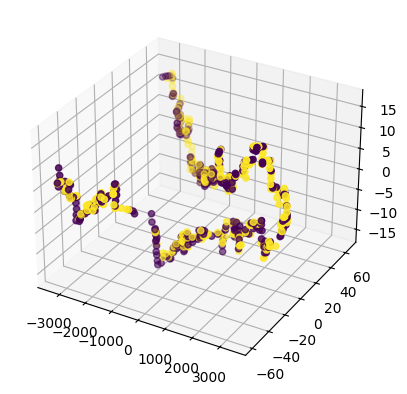

In [30]:
# 评价一下降维的效果
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_3[:, 0], train_data_3[:, 1], train_data_3[:, 2], c=train_label)
plt.show()

In [31]:
# 用TSHNE降维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
train_data_3 = tsne.fit_transform(train_data)
print(train_data_3.shape)

(668, 3)


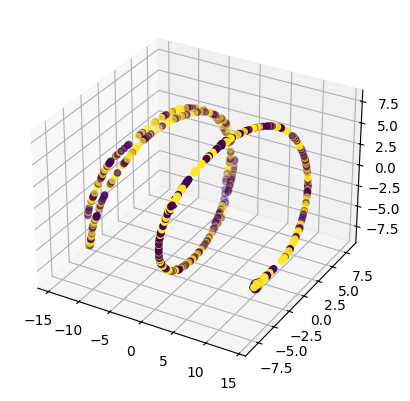

In [32]:
# 评价一下降维的效果
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_3[:, 0], train_data_3[:, 1], train_data_3[:, 2], c=train_label)
plt.show()


(668, 2)


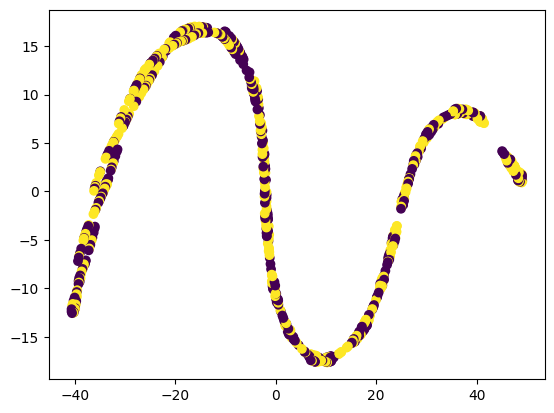

In [33]:
# 用TSHNE降维 2维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
train_data_2 = tsne.fit_transform(train_data)
print(train_data_2.shape)

# 评价一下降维的效果
import matplotlib.pyplot as plt
plt.scatter(train_data_2[:, 0], train_data_2[:, 1], c=train_label)
plt.show()

# 熵权法

熵权法（Entropy Weight Method）的数学公式涉及几个关键步骤，从数据的标准化到最终的权重计算。以下是这个方法的核心数学公式：

### 步骤 1: 数据标准化

首先，对于数据矩阵 \(X\) 中的每个元素 \(x_{ij}\)，进行标准化处理，以消除量纲和数量级的影响。标准化后的值 \(r_{ij}\) 可以通过最大最小标准化（Min-Max Scaling）计算得到：

$$ r_{ij} = \frac{x_{ij} - \min(x_{j})}{\max(x_{j}) - \min(x_{j})} $$

其中，\(x_{j}\) 是第 \(j\) 个指标的所有值，\(\min(x_{j})\) 和 \(\max(x_{j})\) 分别是 \(x_{j}\) 的最小值和最大值。

### 步骤 2: 计算指标的比重

对于每个指标 \(j\)，计算其在每个样本 \(i\) 中的比重 \(p_{ij}\)：

$$ p_{ij} = \frac{r_{ij}}{\sum_{i=1}^{n} r_{ij}} $$

其中，\(n\) 是样本数量。

### 步骤 3: 计算信息熵

接下来，计算每个指标的信息熵 \(E_j\)：

$$ E_j = -\frac{1}{\ln n} \sum_{i=1}^{n} p_{ij} \ln p_{ij} $$

### 步骤 4: 计算差异系数

通过信息熵计算每个指标的差异系数 \(d_j\)：

$$ d_j = 1 - E_j $$

### 步骤 5: 确定权重

最后，根据差异系数确定各指标的权重 \(w_j\)：

$$ w_j = \frac{d_j}{\sum_{j=1}^{m} d_j} $$

其中，\(m\) 是指标的数量。

### 总结

通过以上步骤，熵权法利用信息熵的概念来评估各个指标的不确定性和重要性。指标的信息熵越低，其差异系数越高，意味着该指标在整体评价中的作用越大，因此赋予更高的权重。这种方法为多指标决策提供了一种科学的权重确定方法。


In [34]:
import numpy as np

def entropy_weight(data):
    # 数据标准化
    data = data / data.sum(axis=0)
    
    # 防止log(0)导致无穷大的情况，对所有数值进行微小的偏移
    data = np.where(data == 0, 1e-9, data)
    
    # 计算比重
    k = 1.0 / np.log(len(data))
    weight = -k * (data * np.log(data)).sum(axis=0)
    
    # 计算信息熵和差异系数
    e = 1 - weight
    w = e / e.sum()
    
    return w

weights = entropy_weight(train_data)

print("权重:", weights)


权重: [0.0460435  0.05701612 0.04833478 0.07140375 0.04704877 0.05347865
 0.05534093 0.049011   0.00390582 0.0038904  0.07639739 0.05332739
 0.10052248 0.0502502  0.07287188 0.04969126 0.04983719 0.05693398
 0.05469451]


In [35]:
print(len(weights))

19


## 投影寻踪法

In [36]:

import numpy as np 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(train_data)
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02222222 0.         ... 0.00268637 0.         0.        ]
 [0.         0.02222222 0.         ... 0.00402955 0.         0.        ]
 ...
 [1.         0.62222222 1.         ... 0.99731363 1.         1.        ]
 [1.         0.62222222 1.         ... 0.99798522 1.         1.        ]
 [1.         0.62222222 1.         ... 1.         1.         1.        ]]


gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
 0 |   20   | 9.18566E+00 | 9.18566E+00 | 9.18566E+00 | 9.18566E+00 | 0.00000E+00 
 1 |   40   | 5.78235E+00 | 9.18566E+00 | 8.33483E+00 | 5.78235E+00 | 1.47368E+00 
 2 |   60   | 5.78235E+00 | 1.01857E+01 | 8.44530E+00 | 5.78235E+00 | 1.56014E+00 
 3 |   80   | 5.18566E+00 | 9.18566E+00 | 7.10178E+00 | 5.18566E+00 | 1.70646E+00 
 4 |  100   | 2.18566E+00 | 5.78235E+00 | 5.31974E+00 | 2.18566E+00 | 1.00074E+00 
 5 |  120   | 2.18566E+00 | 5.71252E+00 | 4.47875E+00 | 2.18566E+00 | 1.38039E+00 
 6 |  140   | 2.18566E+00 | 5.18566E+00 | 2.88560E+00 | 2.18566E+00 | 1.09847E+00 
 7 |  160   | 2.02037E+00 | 2.18566E+00 | 2.15260E+00 | 2.02037E+00 | 6.61145E-02 
 8 |  180   | 2.00000E+00 | 2.18565E+00 | 2.02762E+00 | 2.00000E+00 | 3.65244E-02 
 9 |  200   | 2.00000E+00 | 2.02037E+00 | 2.01625E+00 | 2.00000E+00 | 8.12936E-03 
 10|

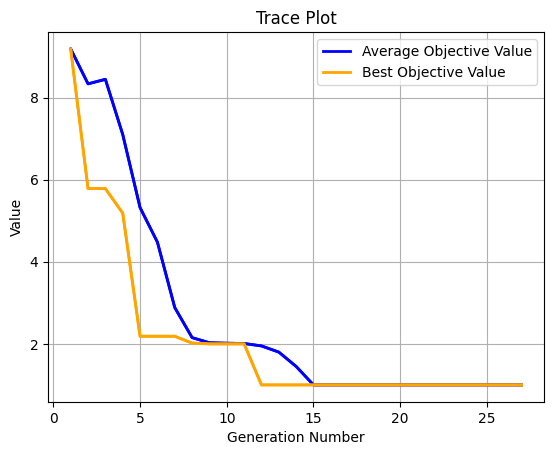

Execution time: 0.04521059989929199 s
Evaluation number: 540
The best objective value is: 1.0
The best variables are: 
1.0	1.0	2.0	1.0	1.0	


In [37]:
import geatpy as ea
import numpy as np

# 构建问题
r = 1  # 目标函数需要用到的额外数据


@ea.Problem.single      #传入数组是一维，如果不加的时候是一个二维数组（20x5）
def evalVars(Vars):  # 定义目标函数（含约束）
    f = np.sum((Vars - r) ** 2)  # 计算目标函数值
    x1 = Vars[0]
    x2 = Vars[1]
    CV = np.array([(x1 - 0.5)**2 - 0.25,
                   (x2 - 1)**2 - 1])  # 计算违反约束程度
    return f, CV


problem = ea.Problem(name='soea quick start demo',
                     M=1,  # 目标维数
                     maxormins=[1],  # 目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标
                     Dim=5,  # 决策变量维数
                     varTypes=[0, 0, 1, 1, 1],  # 决策变量的类型列表，0：实数；1：整数
                     lb=[-1, 1, 2, 1, 0],  # 决策变量下界
                     ub=[1, 4, 5, 2, 1],  # 决策变量上界
                     evalVars=evalVars)
# 构建算法
algorithm = ea.soea_SEGA_templet(problem,
                                 ea.Population(Encoding='RI', NIND=20),
                                 MAXGEN=50,  # 最大进化代数。
                                 logTras=1,  # 表示每隔多少代记录一次日志信息，0表示不记录。
                                 trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
                                 maxTrappedCount=20)  # 进化停滞计数器最大上限值。
# 求解
res = ea.optimize(algorithm, 
                    seed=1, #设置随机种子
                    verbose=True,  # 
                    drawing=1, # 绘图方式
                    outputMsg=True, 
                    drawLog=False,
                    saveFlag=True)


In [38]:
def standardize_data_p(data):
    # 数据归一化 正向
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    standardized_data = (data - min_vals) / (max_vals - min_vals)
    return standardized_data


def standardize_data_n(data):
    # 数据归一化 负向
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    standardized_data = (max_vals - data) / (max_vals - min_vals)
    return standardized_data

In [39]:
def ppr(a):
    X = MinMaxScaler().fit_transform(X)   # sklearn 的归一化模块
    z = np.dot(X, a)
    delta = z.std()
    R = np.corrcoef(np.array([y,z]))[1,0] # 此处没有按照论文中所说添加绝对值
    Q = - (delta * R)                     # 改为求最小值
    return Q

In [40]:
# 无标签问题
def ppc(a):
    X = MinMaxScaler().fit_transform(X)
    z = np.dot(X, a)
    delta = z.std()

    r = np.zeros([X.shape[1], X.shape[1]])
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            r[i, j] = np.abs(z[i]-z[j])

    rho = r.max()
    R = 0
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            f = rho - r[i,j]	
            if f>=0:
                R += f * 1
            else:
                R += f * 0
    return - (delta * R)

In [41]:
# 定义线性约束
constraint_eq = [lambda x: (x**2).sum() - 1]

In [42]:
indexx = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(len(indexx))
indexx[10] = -1
indexx[11] = -1
indexx[-3] = -1
indexx[-4] = -1

19


In [43]:
from sko.GA import GA
from sklearn.preprocessing import MinMaxScaler
import numpy as np


def standardize_data_p(data):
    # 数据归一化 正向
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    standardized_data = (data - min_vals) / (max_vals - min_vals)
    return standardized_data


def standardize_data_n(data):
    # 数据归一化 负向
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    standardized_data = (max_vals - data) / (max_vals - min_vals)
    return standardized_data




# 原始数据，每一列代表一个指标
# data = np.array([
#     [10, 20, 30],
#     [40, 50, 60],
#     [70, 80, 90],
#     [100, 110, 120]
# ])

data = train_data


# 根据 indexx 数组的值判断选择要归一化的列
normalized_data = np.zeros_like(data, dtype=float)
for i, idx in enumerate(indexx):
    if idx == 1:
        normalized_data[:, i:i+1] = standardize_data_p(data[:, i:i+1])
    elif idx == -1:
        normalized_data[:, i:i+1] = standardize_data_n(data[:, i:i+1])
    else:
        normalized_data[:, i:i+1] = data[:, i:i+1]

print("归一化后的数据：\n", normalized_data)


X = np.copy(normalized_data)


def ppc(a):
    global X
    X = MinMaxScaler().fit_transform(X)
    z = np.dot(X, a)
    delta = z.std()

    r = np.zeros([X.shape[1], X.shape[1]])
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            r[i, j] = np.abs(z[i]-z[j])

    rho = r.max()
    R = 0
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            f = rho - r[i][j]
            if f >= 0:
                R += f * 1
            else:
                R += f * 0
    return - (delta * R)


constraint_eq = [lambda x: (x**2).sum() - 1]


ga = GA(func=ppc,
        n_dim=19,
        size_pop=100,
        max_iter=500,
        prob_mut=0.001,
        lb=[-1 for i in range(19)],    # 下限
        ub=[1 for i in range(19)],        # 上限
        constraint_eq=constraint_eq)  # 线性约束，a 的平方和为 1


best_x, best_y=ga.run()
print(best_x)
print(best_y)

归一化后的数据：
 [[0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.02222222 0.         ... 0.99731363 0.         0.        ]
 [0.         0.02222222 0.         ... 0.99597045 0.         0.        ]
 ...
 [1.         0.62222222 1.         ... 0.00268637 1.         1.        ]
 [1.         0.62222222 1.         ... 0.00201478 1.         1.        ]
 [1.         0.62222222 1.         ... 0.         1.         1.        ]]
[ 0.21116469  0.06496498  0.1860396   0.15371058  0.02599189  0.16637865
  0.0376617   0.16268674  0.07864717  0.26207457 -0.49228148 -0.06682232
  0.24000756  0.01088116  0.00302276 -0.50723498 -0.05445519  0.43090461
  0.10663566]
[-57.97627312]


In [44]:
# 一对一打印出指标和对应的权重best_x
print('on_serve_win',best_x[0])
print('one_serve_back',best_x[1])
print('one_serve_success',best_x[2])
print('two_serve_win',best_x[3])
print('two_serve_back',best_x[4])
print('break_pt',best_x[5])
print('break_pt_won',best_x[6])
print('continuous_win',best_x[7])
print('avg_mph',best_x[8])
print('max_mph',best_x[9])
print('double_fault',best_x[10])
print('unf_err',best_x[11])
print('get_ace',best_x[12])
print('return_duce',best_x[13])
# best_x[14] = 0.2746736238
print('get_ad',best_x[14])
# best_x[15] = -0.03003472637
print('run_distance',best_x[15])
print('hit_num',best_x[16])
# best_x[17],best_x[18] = best_x[18],best_x[17]
print('on_net',best_x[17])
print('on_net_success',best_x[18])


on_serve_win 0.2111646893967596
one_serve_back 0.06496498182311594
one_serve_success 0.18603960234044803
two_serve_win 0.15371057849259917
two_serve_back 0.025991887628790344
break_pt 0.16637865204747482
break_pt_won 0.037661702563217325
continuous_win 0.16268674024005958
avg_mph 0.07864716883442302
max_mph 0.26207456773741744
double_fault -0.4922814813936198
unf_err -0.06682232221431506
get_ace 0.24000755667708984
return_duce 0.010881156053577534
get_ad 0.003022760242902045
run_distance -0.5072349759112291
hit_num -0.05445519251987907
on_net 0.43090460988594925
on_net_success 0.10663566311108053


In [45]:
print(sum(best_x))

1.0199783450358613


In [46]:
# 计算每个两个运动员point下的动量
momentum_1 = np.zeros(len(final_match))
momentum_2 = np.zeros(len(final_match))

for i in range(len(final_match)):
    # 上方计算出来的权重，求和并相加
    momentum_1[i] = best_x[0]*one_serve_win_1[i] + best_x[1]*one_serve_back_1[i] + best_x[2]*one_serve_success_1[i] + best_x[3]*two_serve_win_1[i] + best_x[4]*two_serve_back_1[i] + best_x[5]*break_pt_1[i] + best_x[6]*break_pt_won_1[i] + best_x[7]*continuous_win_1[i] + best_x[8]*avg_mph_1[i] + best_x[9]*max_mph_1[i] + best_x[10]*double_fault_1[i] + best_x[11]*unf_err_1[i] + best_x[12]*get_ace_1[i] + best_x[13]*return_duce_1[i] + best_x[14]*get_ad_1[i] + best_x[15]*run_distance_1[i] + best_x[16]*hit_num_1[i] + best_x[17]*on_net_1[i] + best_x[18]*on_net_success_1[i]-i

    momentum_2[i] = best_x[0]*one_serve_win_2[i] + best_x[1]*one_serve_back_2[i] + best_x[2]*one_serve_success_2[i] + best_x[3]*two_serve_win_2[i] + best_x[4]*two_serve_back_2[i] + best_x[5]*break_pt_2[i] + best_x[6]*break_pt_won_2[i] + best_x[7]*continuous_win_2[i] + best_x[8]*avg_mph_2[i] + best_x[9]*max_mph_2[i] + best_x[10]*double_fault_2[i] + best_x[11]*unf_err_2[i] + best_x[12]*get_ace_2[i] + best_x[13]*return_duce_2[i] + best_x[14]*get_ad_2[i] + best_x[15]*run_distance_2[i] + best_x[16]*hit_num_2[i] + best_x[17]*on_net_2[i] + best_x[18]*on_net_success_2[i]-i

    tem = momentum_1[i] - momentum_2[i]

    momentum_1[i] = tem/2
    momentum_2[i] = -tem/2
    
print(momentum_1)
print(momentum_2)



[-1.91086585e+01 -2.04701080e+01 -2.06312175e+01 -2.09484735e+01
 -2.22044267e+01 -2.24303329e+01 -2.39044056e+01 -2.36608158e+01
 -2.40712117e+01 -2.46735770e+01 -2.55883323e+00 -1.85671619e+00
 -1.63904525e+00 -9.79367765e-02  7.69008498e-01 -3.22462663e-01
 -8.07380358e-01  5.12833539e-01  1.57668040e-01 -1.03644018e+00
 -5.51444026e+00 -5.98290759e+00 -5.54727215e+00 -4.20790664e+00
 -5.30242961e+00 -2.51376719e+00 -2.58178508e+00 -2.31549862e+00
 -8.00075741e-01 -1.18507662e+00 -1.99171113e+00 -2.45377708e+00
 -2.09389608e+00 -2.22499441e+00 -3.79872998e+00 -2.28857171e+00
 -1.48816309e+00 -7.30771899e-01 -1.09084989e+00  5.60357520e+00
  6.14430114e+00  7.18873919e+00  7.33473645e+00  6.72196466e+00
  6.39676287e+00  4.90707343e+00  6.72160076e+00  6.89048360e+00
  7.53875446e+00  7.75887465e+00  8.16159207e+00  9.39252277e+00
  7.20292936e+00  5.98339932e+00  5.69959343e+00  7.95598495e+00
  7.56327841e+00  7.38155408e+00  6.95090550e+00  4.72810274e+00
  4.05011236e+00  4.67945

In [47]:
get_point = final_match[:, category['point_victor']]
print(len(get_point),len(momentum_1),len(momentum_2))

334 334 334


[243.70507695510298, 3.64702204029777, 2454.8267161759777, 6076.424632201648, 7029.181023546762]
[5.538751748979613, 0.038798106811678404, 35.068953088228255, 94.94413487815075, 115.23247579584856]


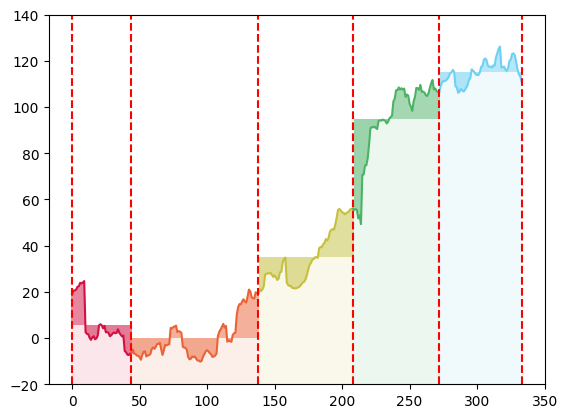

In [75]:
# 在同一个坐标系下画出两个运动员的动量变化
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

game = [0, 44, 138, 208, 272, 333]
avg = [0, 0, 0, 0, 0]
colors = ["#d11141", "#ea6336", "#c5c03e", "#4cb266", "#6dd1f3"]

x = np.arange(334)

for i in range(len(momentum_2)):
    if i <= game[1]:
        avg[0] += momentum_2[i]
    elif i <= game[2]:
        avg[1] += momentum_2[i]
    elif i <= game[3]:
        avg[2] += momentum_2[i]
    elif i <= game[4]:
        avg[3] += momentum_2[i]
    elif i <= game[5]:
        avg[4] += momentum_2[i]

print(avg)

for i in range(1, 6):
    avg[i - 1] /= (game[i] - game[i - 1])

print(avg)

fig, ax = plt.subplots()
# ax.plot(momentum_1, label='player 1')
for i in range(5):
    ax.plot(x[game[i] : game[i + 1] + 1], momentum_2[game[i] : game[i + 1] + 1], color = colors[i], alpha = 1)
# ax.plot(momentum_2, label='player 2')

for i in range(len(momentum_2)):
    now = (i > game[1]) + (i > game[2]) + (i > game[3]) + (i > game[4])
    bottom = avg[now] if avg[now] < momentum_2[i] else momentum_2[i]
    height = abs(avg[now] - momentum_2[i])
    ax.bar(i, bottom = bottom, height = height, ls="--", align = "center", fc=colors[now], alpha = 0.5, width = 1)
    ax.bar(i, bottom = -20, height = avg[now] + 20, ls="--", align = "center", fc=colors[now], alpha = 0.1, width = 1)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
for i in game:
    plt.axvline(x = i, color='r', linestyle='--')

ax.set_xticks([i for i in range(0, 351, 50)])
ax.set_yticks([i for i in range(-20, 141, 20)])

plt.legend()
plt.show()
